# Grover's Algorithm Demo 2

## Imports and Setup

First, let's import the necessary functions from our `src` module and Qiskit.


In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator # Use AerSimulator

# Get the absolute path to the parent directory (project root)
project_root = os.path.abspath(os.path.join('..'))
# Get the absolute path to the src directory (optional, not needed for sys.path)
# src_path = os.path.join(project_root, 'src')

# Add project_root to sys.path if it's not already there
if project_root not in sys.path:
    sys.path.insert(0, project_root) # Add project root

# Import necessary functions using the package structure 'src.'
from src.grover_circuit import create_grover_circuit, calculate_optimal_iterations
from src.performance import print_performance_metrics 


## Define Parameters

Define the number of qubits and the target state (as a binary string) we want to find.

In [2]:
num_qubits = 4
target_state = "1101" # Example target state for 4 qubits

# Verify length
assert len(target_state) == num_qubits, f"Target state length must match num_qubits ({num_qubits})"

shots = 2048 # Number of simulation shots

## Create and Draw Circuit (Optimal Iterations)

We use the `create_grover_circuit` function. It automatically calculates the optimal number of iterations if not specified.

Optimal number of iterations for 4 qubits: 3
     ┌───┐ ░ ┌─────────┐ ░ ┌───────────┐ ░ ┌─────────┐ ░ ┌───────────┐ ░ ┌─────────┐ ░ ┌───────────┐ ░ ┌─┐         
q_0: ┤ H ├─░─┤0        ├─░─┤0          ├─░─┤0        ├─░─┤0          ├─░─┤0        ├─░─┤0          ├─░─┤M├─────────
     ├───┤ ░ │         │ ░ │           │ ░ │         │ ░ │           │ ░ │         │ ░ │           │ ░ └╥┘┌─┐      
q_1: ┤ H ├─░─┤1        ├─░─┤1          ├─░─┤1        ├─░─┤1          ├─░─┤1        ├─░─┤1          ├─░──╫─┤M├──────
     ├───┤ ░ │  Oracle │ ░ │  Diffuser │ ░ │  Oracle │ ░ │  Diffuser │ ░ │  Oracle │ ░ │  Diffuser │ ░  ║ └╥┘┌─┐   
q_2: ┤ H ├─░─┤2        ├─░─┤2          ├─░─┤2        ├─░─┤2          ├─░─┤2        ├─░─┤2          ├─░──╫──╫─┤M├───
     ├───┤ ░ │         │ ░ │           │ ░ │         │ ░ │           │ ░ │         │ ░ │           │ ░  ║  ║ └╥┘┌─┐
q_3: ┤ H ├─░─┤3        ├─░─┤3          ├─░─┤3        ├─░─┤3          ├─░─┤3        ├─░─┤3          ├─░──╫──╫──╫─┤M├
     └───┘ ░ └─────────┘ ░ 

e:\DescargasE\GroverAlgorithm\venvGrover\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:269: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: e:\DescargasE\GroverAlgorithm\venvGrover\Lib\site-packages\qiskit\visualization\circuit\styles\iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)


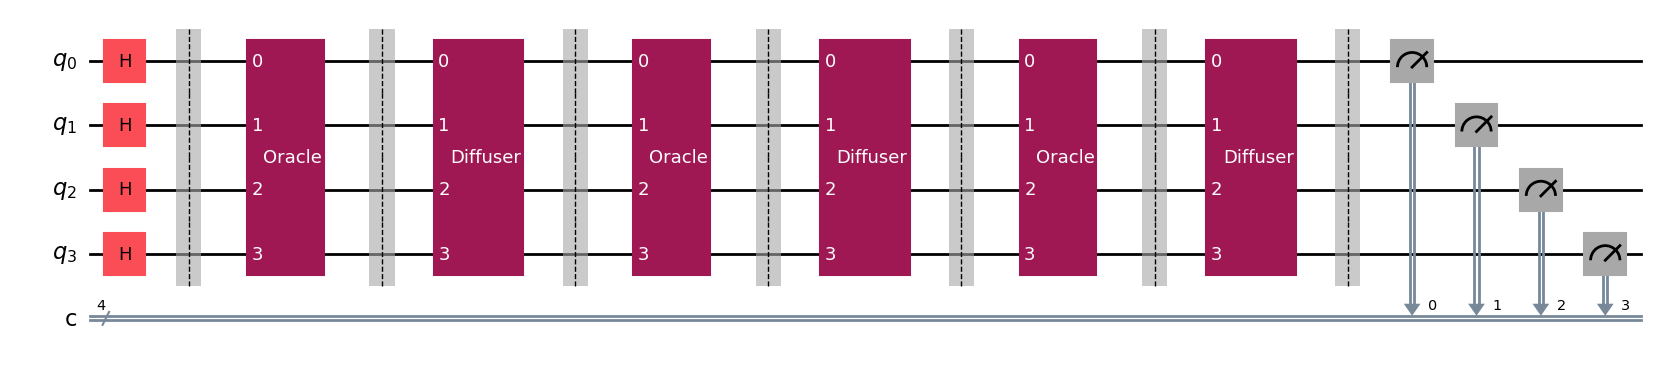


Performance Metrics (Optimal Iterations):
Circuit Performance Metrics:
- Depth: 8
- Gate Counts: OrderedDict([('barrier', 7), ('h', 4), ('measure', 4), ('Oracle', 3), ('Diffuser', 3)])


In [3]:
# Calculate optimal iterations
optimal_iters = calculate_optimal_iterations(num_qubits)
print(f"Optimal number of iterations for {num_qubits} qubits: {optimal_iters}")

# Create the Grover circuit using the optimal iterations (iterations=None uses the calculator)
grover_circuit_opt = create_grover_circuit(num_qubits, target_state, iterations=None, measure=True)

# Draw the circuit (optional, can be large)
print(grover_circuit_opt.draw(output='text', fold=120)) # Text output
grover_circuit_opt.draw(output='mpl', style='iqx') 
plt.show() 

# Optional: Print performance metrics for the optimal circuit
print("\nPerformance Metrics (Optimal Iterations):")
print_performance_metrics(grover_circuit_opt)

## Simulate Circuit (Optimal Iterations)

We'll use the `qasm_simulator` to get measurement counts.


Transpiling circuit (Optimal Iterations)...
Transpilation complete.
Running simulation (2048 shots, 3 iterations)...
Simulation complete.


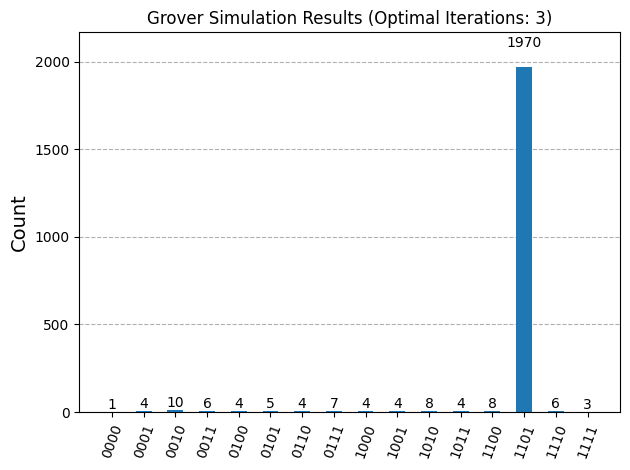

In [4]:
# Get the simulator
simulator = AerSimulator()

# Transpile the circuit for the simulator
print("\nTranspiling circuit (Optimal Iterations)...")
t_circuit_opt = transpile(grover_circuit_opt, simulator)
print("Transpilation complete.")

# Run the job
print(f"Running simulation ({shots} shots, {optimal_iters} iterations)...")
job_opt = simulator.run(t_circuit_opt, shots=shots)
result_opt = job_opt.result()
counts_optimal = result_opt.get_counts(grover_circuit_opt) 
print("Simulation complete.")

# Display the plot
plot_histogram(counts_optimal, title=f'Grover Simulation Results (Optimal Iterations: {optimal_iters})')
plt.show()

## Create and Simulate Circuit (1 Iteration)


--- Running Simulation with 1 Iteration ---
Transpiling circuit (1 iteration)...
Transpilation complete.
Running simulation (2048 shots, 1 iteration(s))...
Simulation complete.


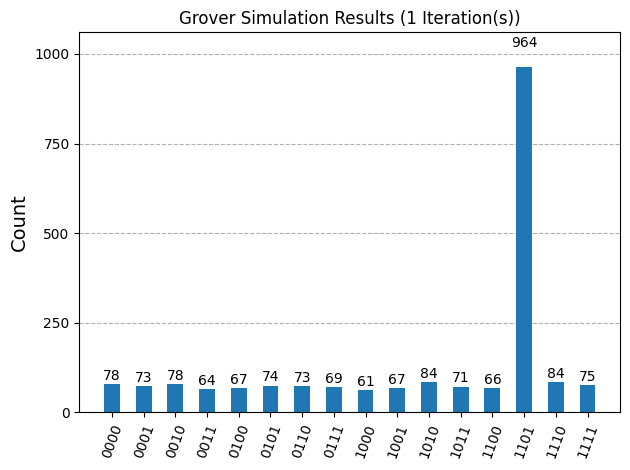

In [5]:
# --- Simulation with 1 Iteration ---
print("\n--- Running Simulation with 1 Iteration ---")
iterations_to_test = 1

# Create the Grover circuit with the specified number of iterations
grover_circuit_1iter = create_grover_circuit(num_qubits, target_state, iterations=iterations_to_test, measure=True) 

# Transpile
print("Transpiling circuit (1 iteration)...")
t_circuit_1iter = transpile(grover_circuit_1iter, simulator)
print("Transpilation complete.")

# Run
print(f"Running simulation ({shots} shots, {iterations_to_test} iteration(s))...")
job_1iter = simulator.run(t_circuit_1iter, shots=shots)
result_1iter = job_1iter.result()
counts_1iter = result_1iter.get_counts(grover_circuit_1iter)
print("Simulation complete.")

# Plotting
plot_histogram(counts_1iter, title=f'Grover Simulation Results ({iterations_to_test} Iteration(s))')
plt.show()

## 5. Performance Metrics (Optional)

Check the high-level gate counts and depth before simulation.

### Performance with optimal iterations 

In [6]:
print_performance_metrics(grover_circuit_opt)

Circuit Performance Metrics:
- Depth: 8
- Gate Counts: OrderedDict([('barrier', 7), ('h', 4), ('measure', 4), ('Oracle', 3), ('Diffuser', 3)])


### Performance with 1 iteration

In [7]:
print_performance_metrics(grover_circuit_1iter)

Circuit Performance Metrics:
- Depth: 4
- Gate Counts: OrderedDict([('h', 4), ('measure', 4), ('barrier', 3), ('Oracle', 1), ('Diffuser', 1)])


## Analysis and Comparison

Let's look at the measurement outcomes and compare both simulations.

In [8]:
print("\n--- Analysis ---") 

# Analysis for Optimal Iterations
print(f"\nAnalysis for Optimal Iterations ({optimal_iters}):")
print("Counts:", counts_optimal) 

# Find the most frequent outcome
most_frequent_optimal = max(counts_optimal, key=counts_optimal.get) 
print(f"\nTarget state:           {target_state}")
print(f"Most frequent outcome:  {most_frequent_optimal}")

prob_optimal = counts_optimal.get(target_state, 0) / shots 
if most_frequent_optimal == target_state:
    print(f"\nSuccess! Most frequent outcome matches target. Probability: {prob_optimal:.3f}")
else:
    print(f"\nFailure. Most frequent outcome ({most_frequent_optimal}) does not match target. Target probability: {prob_optimal:.3f}") 

# Analysis for 1 Iteration
print(f"\nAnalysis for {iterations_to_test} Iteration(s):")
print("Counts:", counts_1iter)
most_frequent_1iter = max(counts_1iter, key=counts_1iter.get)
print(f"\nTarget state:           {target_state}")
print(f"Most frequent outcome:  {most_frequent_1iter}")

prob_1iter = counts_1iter.get(target_state, 0) / shots
if most_frequent_1iter == target_state:
     print(f"\nSuccess! Most frequent outcome matches target. Probability: {prob_1iter:.3f}")
else:
    print(f"\nFailure. Most frequent outcome ({most_frequent_1iter}) does not match target. Target probability: {prob_1iter:.3f}") 

# Comparison
print("\n--- Comparison ---")
print(f"Probability of finding target state ({target_state}):")
print(f" - Optimal ({optimal_iters} iterations): {prob_optimal:.3f}")
print(f" - {iterations_to_test} iteration(s):       {prob_1iter:.3f}")

# Ensure plots are shown if using interactive backends outside the cell execution
# plt.show() # May not be needed depending on backend


--- Analysis ---

Analysis for Optimal Iterations (3):
Counts: {'1101': 1970, '0101': 5, '0000': 1, '1000': 4, '0010': 10, '0111': 7, '0110': 4, '0011': 6, '1001': 4, '1010': 8, '1100': 8, '1011': 4, '0100': 4, '1111': 3, '1110': 6, '0001': 4}

Target state:           1101
Most frequent outcome:  1101

Success! Most frequent outcome matches target. Probability: 0.962

Analysis for 1 Iteration(s):
Counts: {'1101': 964, '1010': 84, '1001': 67, '0010': 78, '0011': 64, '1000': 61, '0000': 78, '1111': 75, '0001': 73, '1110': 84, '0101': 74, '0110': 73, '1100': 66, '1011': 71, '0100': 67, '0111': 69}

Target state:           1101
Most frequent outcome:  1101

Success! Most frequent outcome matches target. Probability: 0.471

--- Comparison ---
Probability of finding target state (1101):
 - Optimal (3 iterations): 0.962
 - 1 iteration(s):       0.471
